<a href="https://colab.research.google.com/github/rahilv99/Microbial_Optimization_Algorithim/blob/main/You_Lab_Growth_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTES ABOUT GENETIC ALGORITHIM
- The "genetic algorithm" part is NOT selecting the best medium, it is selecting the model that best reflects the relationships of the medium
- May need to implement manifolds to improve CV testing

- **something is wrong -> best soln always index 0, i think all ANNs in population are the same**

TO DO LIST
- change optimization model to better model the context of the problem
  - loss fcn is MSE right now
- find what training factors to evaluate on (not MSE)


In [3]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.0 MB/s eta 0:00:00


Import libraries

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pygad
import pygad.nn
import pygad.gann

Create dummy data for demo

In [ ]:
from google.colab import files
import csv
uploaded = files.upload()

filename = list(uploaded.keys())[0]

# Read the text file and store data in a list
data_list = []
with open(filename, newline='') as txtfile:
    txt_reader = csv.reader(txtfile, delimiter=',')
    for row in txt_reader:
        data_list.append(row)

# Convert the list of lists into a NumPy array (matrix)
data_matrix = np.array(data_list[1:])

# Print the resulting matrix
print("Data Matrix:")
print(data_matrix)


Saving Dummy_Optimization_Data.txt to Dummy_Optimization_Data (1).txt
Data Matrix:
[['80' '10' '5' '30' '7.0' '0.45']
 ['75' '15' '3' '25' '7.2' '0.55']
 ['70' '12' '7' '35' '7.0' '0.63']
 ['85' '8' '4' '25' '6.8' '0.30']
 ['80' '10' '6' '30' '7.0' '0.40']
 ['75' '15' '5' '32' '7.2' '0.50']
 ['78' '12' '3' '28' '7.5' '0.35']
 ['82' '10' '4' '28' '7.0' '0.42']
 ['77' '14' '6' '32' '7.2' '0.58']
 ['79' '9' '5' '29' '7.1' '0.48']
 ['73' '13' '4' '31' '7.3' '0.52']
 ['76' '11' '6' '30' '7.2' '0.47']
 ['81' '9' '3' '27' '7.4' '0.60']
 ['74' '14' '5' '28' '7.1' '0.38']
 ['79' '12' '4' '26' '7.3' '0.43']
 ['84' '11' '6' '29' '7.0' '0.55']
 ['76' '13' '3' '30' '7.2' '0.51']
 ['72' '10' '7' '33' '7.1' '0.37']
 ['85' '14' '5' '28' '7.4' '0.59']
 ['78' '11' '4' '27' '7.3' '0.46']
 ['81' '13' '6' '31' '7.0' '0.53']
 ['74' '10' '3' '29' '7.2' '0.42']
 ['77' '15' '5' '30' '7.1' '0.49']
 ['80' '12' '4' '28' '7.4' '0.57']
 ['83' '9' '6' '32' '7.2' '0.44']
 ['75' '11' '5' '27' '7.3' '0.36']
 ['79' '13'

In [5]:
input_data = np.asarray(data_matrix[:,:5], dtype=np.float32)
target_data = np.asarray(data_matrix[:,-1], dtype=np.float32)
print("factors:")
print(input_data)
print("Growth Rate:")
print(target_data)

NameError: name 'data_matrix' is not defined

Standardize data
- Can add manifolds to avoid overtraining and add cross validation

In [ ]:
# Standardize input data using scikit-learn
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data)

input_data_train, input_data_test, target_data_train, target_data_test = train_test_split(input_data_scaled, target_data, test_size=0.2, random_state=42)

print("Input Training Data:")
print(input_data_train)
print("Growth Rate Training Data:")
print(target_data_train)

Input Training Data:
[[ 1.8523829  -1.9557855  -0.6138344  -1.8145751  -2.6508913 ]
 [-0.06860677  0.11781841 -1.4082084  -0.48388672  2.068616  ]
 [ 1.0291016   1.1546204   1.7692875   0.40323892  1.3944011 ]
 [ 1.5779557   0.6362194  -1.4082084  -0.92744946 -0.6282468 ]
 [-0.06860677 -0.40058258 -0.6138344  -0.92744946  0.7201862 ]
 [-1.7151693  -0.9189836   1.7692875   1.7339274  -0.6282468 ]
 [-1.1663151   1.1546204   0.18053955 -0.48388672 -0.6282468 ]
 [ 1.3035287   1.1546204   0.97491354  1.2903646  -0.6282468 ]
 [ 1.5779557  -0.40058258  0.97491354 -0.04032389 -1.3024616 ]
 [ 0.20582032 -1.4373846   0.18053955 -0.04032389 -0.6282468 ]
 [-0.61746097  0.6362194  -1.4082084   0.40323892  0.0459681 ]
 [ 0.7546745  -0.9189836   0.18053955 -0.48388672  0.7201862 ]
 [ 0.20582032  0.6362194  -1.4082084  -1.3710123  -0.6282468 ]
 [ 0.4802474  -0.9189836   0.18053955  0.40323892 -1.3024616 ]
 [-1.4407423   0.11781841 -0.6138344   0.8468017   0.0459681 ]
 [ 0.20582032  0.11781841  0.18053


- Can change # of nodes (increase for high bias, decrease for high variance)
- lambda in L2 (increase for high variance, decrease for high bias)
- Can add more layers (increase for high bias, decrease for high variance)

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions= 6, # this is the number of models in the initial population
                                num_neurons_input= 5, # this is the number of features in the medium
                                num_neurons_hidden_layers=[16], # each index is each hidden layer's # of neurons
                                num_neurons_output=1, # output is the growth factor
                                hidden_activations=["relu"],
                                output_activation="None")


Get current population
- This function returns a list of references
- Each reference is a vector of weights in one of the solution ANNs
- Converts weight matrix of network to vector representation

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

Create fitness function
- note: defines fitness of MODEL (multiple models created from Pygad.GANN)
- INPUT: solution, solution index
- OUTPUT: fitness of soltution (numerical)

- I THINK "predict" function runs the training data through the network and returns estimated growth factor
- **current implementation calculates MSE of predicted vs expected data**

In [1]:
def fitness_func(ga_instance, solution, sol_idx):
    global GANN_instance, input_data_train, target_data_train

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx], data_inputs=input_data_train, problem_type="regression")

    solution_fitness = 1.0/mean_squared_error(target_data_train, predictions) + 0.00000000001

    return solution_fitness

Create generation callback function
- update prediction of output by changing weights of the ANNs in the population
- executes on each new generation

In [ ]:

def callback_generation(ga_instance):
    global GANN_instance

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution()[1]}")

Create instance of Pygad.GA class
- this reflects the "genetic algorithim part" (selection, breeding, mutation, etc)
- default values right now

In [ ]:

initial_population = population_vectors.copy()

ga_instance = pygad.GA(num_generations= 1000,  # number of times to run GA algorithim
                       num_parents_mating= 5, # number of models selected from population to exchange genes for next gen
                       initial_population=initial_population, # vector of initial population growth factors
                       fitness_func=fitness_func,
                       mutation_percent_genes= 25, # edit to have more or less crossover
                       init_range_low= -1, #idk what this does
                       init_range_high= 5, #idk what this does
                       parent_selection_type= "rws", # selects based on growth factor (higher % chance of selecting higher growth factor model)
                       crossover_type= "uniform",
                       mutation_type= "random",
                       keep_parents= 5,
                       on_generation=callback_generation)

ga_instance.run()


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation = 1
Fitness    = 9.406996910119279
Generation = 2
Fitness    = 5.1954348340447565
Generation = 3
Fitness    = 5.1954348340447565
Generation = 4
Fitness    = 5.1954348340447565
Generation = 5
Fitness    = 5.1954348340447565
Generation = 6
Fitness    = 7.484675895811837
Generation = 7
Fitness    = 7.484675895811837
Generation = 8
Fitness    = 7.484675895811837
Generation = 9
Fitness    = 7.484675895811837
Generation = 10
Fitness    = 7.484675895811837
Generation = 11
Fitness    = 7.484675895811837
Generation = 12
Fitness    = 7.484675895811837
Generation = 13
Fitness    = 7.484675895811837
Generation = 14
Fitness    = 7.484675895811837
Generation = 15
Fitness    = 7.484675895811837
Generation = 16
Fitness    = 7.484675895811837
Generation = 17
Fitness    = 7.484675895811837
Generation = 18
Fitness    = 7.484675895811837
Generation = 19
Fitness    = 7.484675895811837
Generation = 20
Fitness    = 7.484675895811837
Generation = 21
Fitness    = 7.484675895811837
Generation = 22
Fi

Plot fitness of population

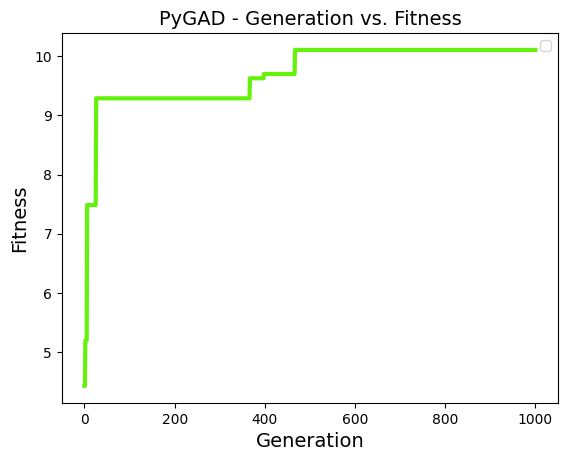

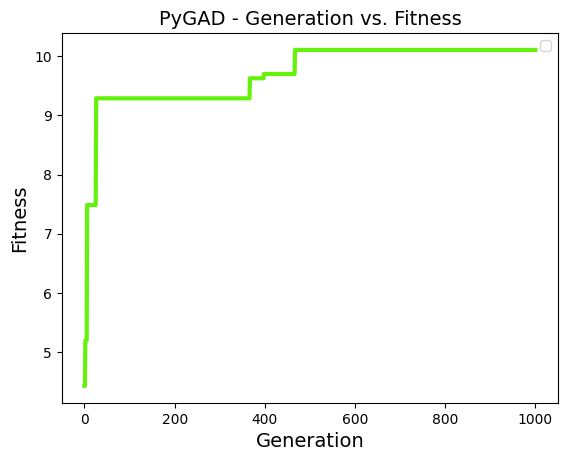

In [ ]:
ga_instance.plot_fitness()

Use Best Model
- Return best model, find values that optimize growth factor

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
#print(f"Parameters of the best solution : {solution}")
print(f"Index of the best solution : {solution_idx}")
print(f"Fitness value of the best solution = {solution_fitness}")

predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx], data_inputs=input_data_test, problem_type="regression")
predictions = [arr[0].round(2) for arr in predictions]
print(f"MSE of best solution:", mean_squared_error(predictions, target_data_test))

# This predicts the growth factor of a given medium (in data inputs)

print(f"Predicted growth factors:", predictions)
print(f"Known growth factors:", target_data_test)

Index of the best solution : 0
Fitness value of the best solution = 10.108872964760174
MSE of best solution: 0.14732222112019877
Predicted growth factors: [0.5, 1.3, 0.07, 0.28, 0.42, 0.4, 0.74, 0.66, 0.04]
Known growth factors: [0.43 0.44 0.36 0.55 0.52 0.46 0.4  0.6  0.58]
